# <font color="purple"> House Price Prediction
- 집의 정보를 가지고 가격을 예측하는 **회귀문제**
- 평가 지표 : **RMSE**


## <font color="purple"> <feature 설명>

- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 화장실의 수
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

----

In [1]:
#Analysis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
import pandas as pd
import numpy as np
from scipy.stats import norm # 정규분포
from sklearn.preprocessing import StandardScaler
from scipy import stats  # 통계툴 (seaborn과 함께 import 해주기)
#scipy는 과학기술 계산용 함수 및 알고리즘 제공

#Visualization
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import gc

In [2]:
# 데이터 열기

df= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [3]:
print(df.shape)
print(df_test.shape)

(15035, 21)
(6468, 20)


In [4]:
# 결측치 파악 ( 결측치 없음 )
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df_test.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## <font color = 'purple'>**1. 시각화**
### 1) price(목적변수) 분포와 정규화

In [6]:
df['price'].describe().astype('int32') 

# min과 max가 너무 차이나고, 표준편차도 높음
# e로 지수표현되어서 나와서 astype('int32')로 바꿔줌

count      15035
mean      540682
std       371524
min        78000
25%       322000
50%       450000
75%       645000
max      7700000
Name: price, dtype: int32

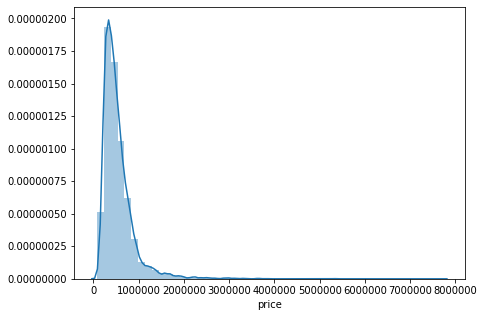

In [7]:
# histogram 그리기

f, ax = plt.subplots(figsize=(7,5)) 
# subplot할때 하는 것! f는 figure로서 전체 subplot을 말하고, ax는 낱개를 말함. 

sns.distplot(df['price']) # distplot은 히스토그램 + kdeplot

In [8]:
# 왜도, 첨도 계산하기

print('Skewness(왜도) : %f' % df['price'].skew()) # %f : format (% 뒤가 f역할)
# 왜도(skew) : 오른쪽 꼬리가 길수록 값이 크다

print('Kurtosis(첨도) : %f' % df['price'].kurt())
# 첨도(kurt) : 3에 가까울수록 정규분포에 가까움. K<3이면 평평, K>3이면 뾰족!

Skewness(왜도) : 4.290252
Kurtosis(첨도) : 40.154919


보이는 것과 같이 price는 정규분포가 아님.   
근데 회귀분석을 위해서는 타겟변수 **정규화**해줘야함!   
> 모든 변수 정규화해줘야 하긴함! 회귀 가정은 **정규화**라는걸 기억하자  
> (cf. decision tree, xgboost, lgbm 계열은 정규화 안해도됨ㅎㅎ. 회귀만 정규화 필요함)

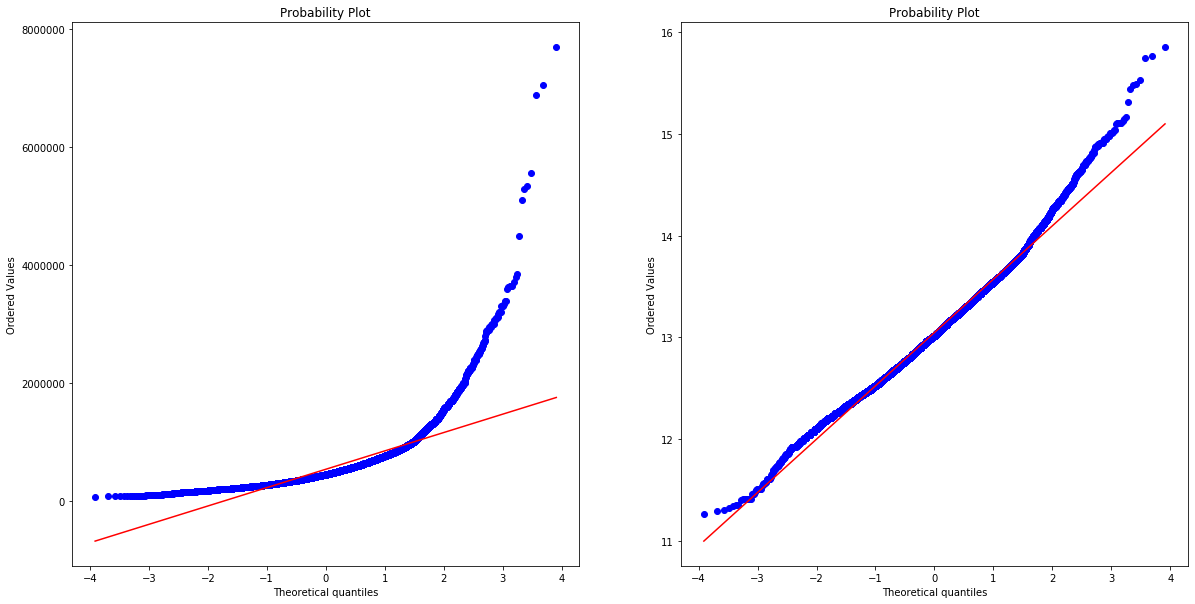

In [9]:
# Scipy. stats 패키지 : QQ plot이용해 정규성 파악하기 
# (QQ plot : 확률분포가 정규분포인지 확인)

fig = plt.figure(figsize=(20,10))

# 플롯 두개 그려서 비교

fig.add_subplot(1,2,1) # (1,2,1) : 1*2 행렬의 첫번째 
res = stats.probplot( df['price'], plot = plt) #probplot : QQ플롯을 그리기 위한 명령어

fig.add_subplot(1,2,2)
res = stats.probplot( np.log1p(df['price']), plot=plt) #log 취해줌 > 정규성 가짐!

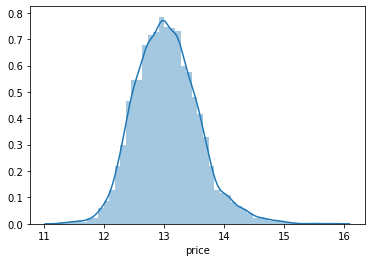

In [10]:
# 로그 취해주고 정규화해주기

df['price'] = np.log1p(df['price'])

f, ax = plt.subplots(figsize=(6,4))
sns.distplot(df['price'])

### 2) 반응변수 시각화
> 피어슨 상관계수 : 연속형 변수들에만  
> **스피어만 순위 상관계수** : 범주형 변수들도 포함되어 있을 때 > 이 문제는 범주형도 포함

Index(['price', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above',
       'bathrooms', 'lat', 'bedrooms', 'floors', 'view'],
      dtype='object')
[[ 1.00000000e+00  6.62125256e-01  6.46482431e-01  5.73777345e-01
   5.47867765e-01  4.98988916e-01  4.50691696e-01  3.50184916e-01
   3.28674116e-01  2.91719516e-01]
 [ 6.62125256e-01  1.00000000e+00  7.17799601e-01  6.65039030e-01
   7.15099945e-01  6.61112311e-01  1.00037933e-01  3.86833231e-01
   5.04506199e-01  2.11468857e-01]
 [ 6.46482431e-01  7.17799601e-01  1.00000000e+00  7.48213636e-01
   8.46081041e-01  7.48612310e-01  2.55443864e-02  6.49001466e-01
   4.08416554e-01  2.27205439e-01]
 [ 5.73777345e-01  6.65039030e-01  7.48213636e-01  1.00000000e+00
   6.99157749e-01  5.75235493e-01  2.51542683e-02  4.45932971e-01
   3.11335434e-01  2.52132180e-01]
 [ 5.47867765e-01  7.15099945e-01  8.46081041e-01  6.99157749e-01
   1.00000000e+00  6.95671508e-01 -2.82371151e-02  5.40892582e-01
   6.03085217e-01  1.40010628e-01]
 [ 4.98988916e

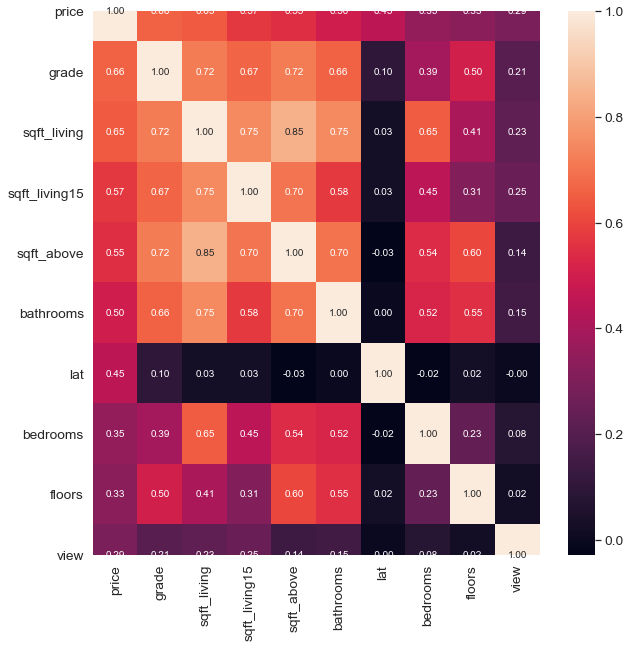

In [11]:
# price와 상관관계가 높은 column 뽑기

import scipy as sp # 통계 패키지

cor_abs = abs(df.corr(method='spearman')) # abs 는 절댓값 함수. 반비례관계(마이너스)도 고려

cor_cols = cor_abs.nlargest(n=10, columns='price').index
# nlargest : 컬렉션 내부에서 가장 큰 n개의 아이템 index 찾기
print(cor_cols)

cor = np.array(sp.stats.spearmanr(df[cor_cols].values))[0]
# [0] : 상관계수 [1] : p-value !!!!

print(cor)

# 히트맵 그리기
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, annot_kws={'size':10}, 
            xticklabels=cor_cols.values, yticklabels=cor_cols.values)

# annot=dT : 숫자표시, annot_kws : 숫자크기, xticklabels : 눈금레이블 설정

### 1) grade - price 관계 시각화
concat으로 데이터 프레임 결합 (디폴트 : axis=1) > 그래프 그리기

       price  grade
0  12.309987      7
1  12.100718      6
2  13.142168      8
3  12.458779      7
4  12.583999      7


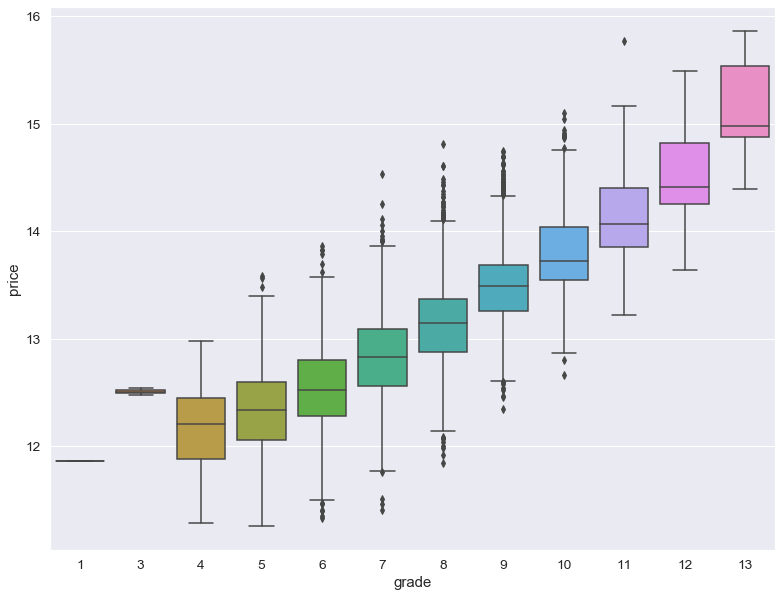

In [12]:
data = pd.concat( [df['price'], df['grade']], axis=1)
print(data.head())

f, ax = plt.subplots(figsize=(13,10))
fig = sns.boxplot(data=data, x='grade', y='price')


등급 3의 경우 왜 특히 가격이 높다.    
등급 11은 outlier가 두드러진다

### 2) sqft_living(주거 평방피트) - price관계 시각화
- sqft_living : 주거 공간의 평방피트(실제 사용면적)  
- sqft_lot : 부지의 평방피트(총 부지의 면적)

- sqft_living15 : 2015년 기준 주거 공간의 평방피트(집을 재건축 했다면 변화가 있을 수 있음)

- sqft_above : 지하실을 제외한 평방피트
- sqft_basement : 지하실의 평방피트

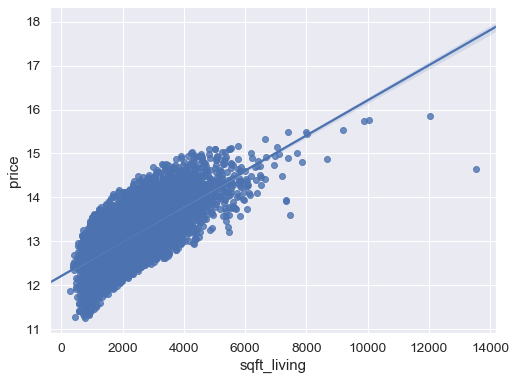

In [13]:
data = pd.concat( [df['sqft_living'], df['price']], axis=1)
f, ax = plt.subplots(figsize=(8,6))

#regplot : 산점도 나타내기(선형회귀 선까지!)
fig = sns.regplot(data=data, x='sqft_living', y='price')

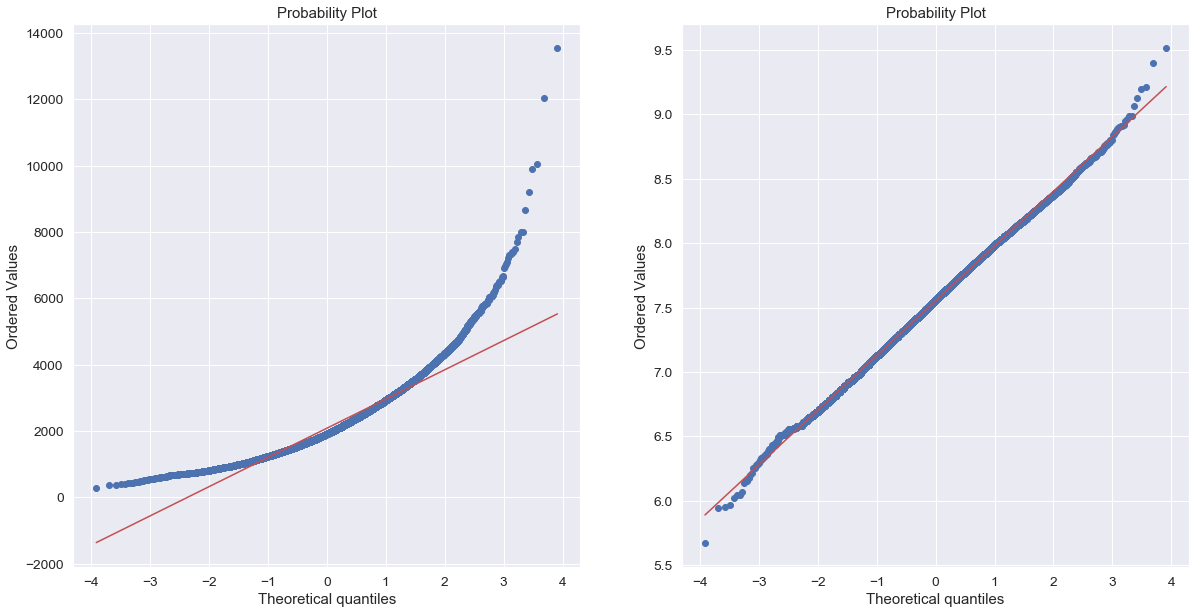

In [14]:
fig = plt.figure(figsize=(20,10))

# 플롯 두개 그려서 비교

fig.add_subplot(1,2,1) # (1,2,1) : 1*2 행렬의 첫번째 
res = stats.probplot( df['sqft_living'], plot = plt) #probplot : QQ플롯을 그리기 위한 명령어

fig.add_subplot(1,2,2)
res = stats.probplot( np.log1p(df['sqft_living']), plot=plt) #log 취해줌 > 정규성 가짐!

In [15]:
# 정규화 후 plot 다시그리기

df['sqft_living'] = np.log1p(df['sqft_living'].values)

### 3) sqft_living15(2015년 기준 주거 평방피트) - price 관계 시각화

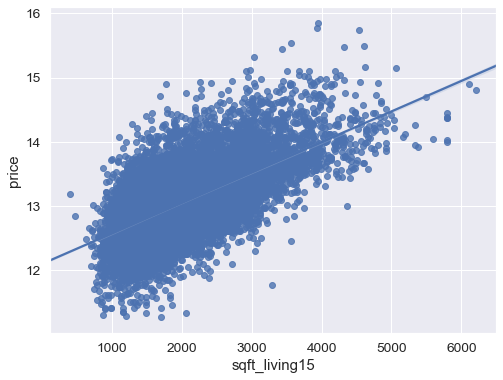

In [16]:
data = pd.concat( [df['price'], df['sqft_living15']], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig = sns.regplot(data=data, x='sqft_living15', y='price')

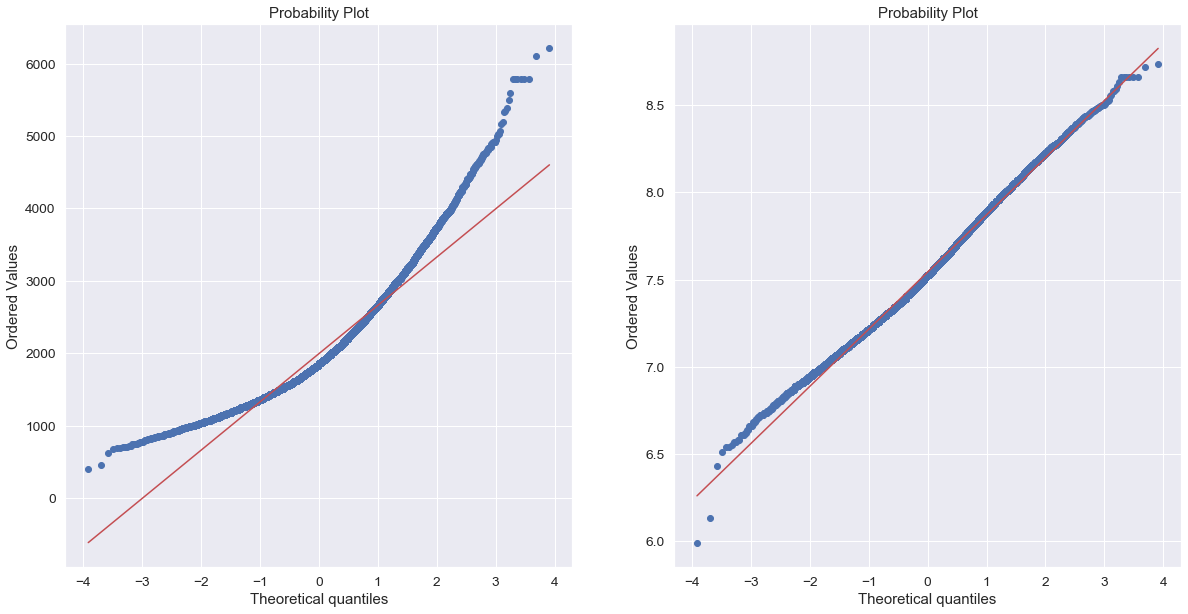

In [17]:
fig = plt.figure(figsize=(20,10))

# 플롯 두개 그려서 비교

fig.add_subplot(1,2,1) # (1,2,1) : 1*2 행렬의 첫번째 
res = stats.probplot( df['sqft_living15'], plot = plt) #probplot : QQ플롯을 그리기 위한 명령어

fig.add_subplot(1,2,2)
res = stats.probplot( np.log1p(df['sqft_living15']), plot=plt) #log 취해줌 > 정규성 가짐!

2015년에 재건축을 하면서 회귀선에 매우 어긋났던 친구들이 없어짐!  
근데 정규성도 안맞네? 정규화해주자. 근데 train 하면 test도 해줘야함. 

### 4) sqft_above(지하실 제외 면적) - price 관계 시각화

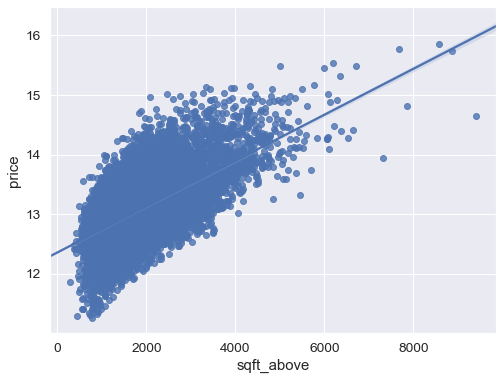

In [18]:
data = pd.concat( [ df['sqft_above'], df['price']], axis=1 )
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(data=data, x='sqft_above', y='price')

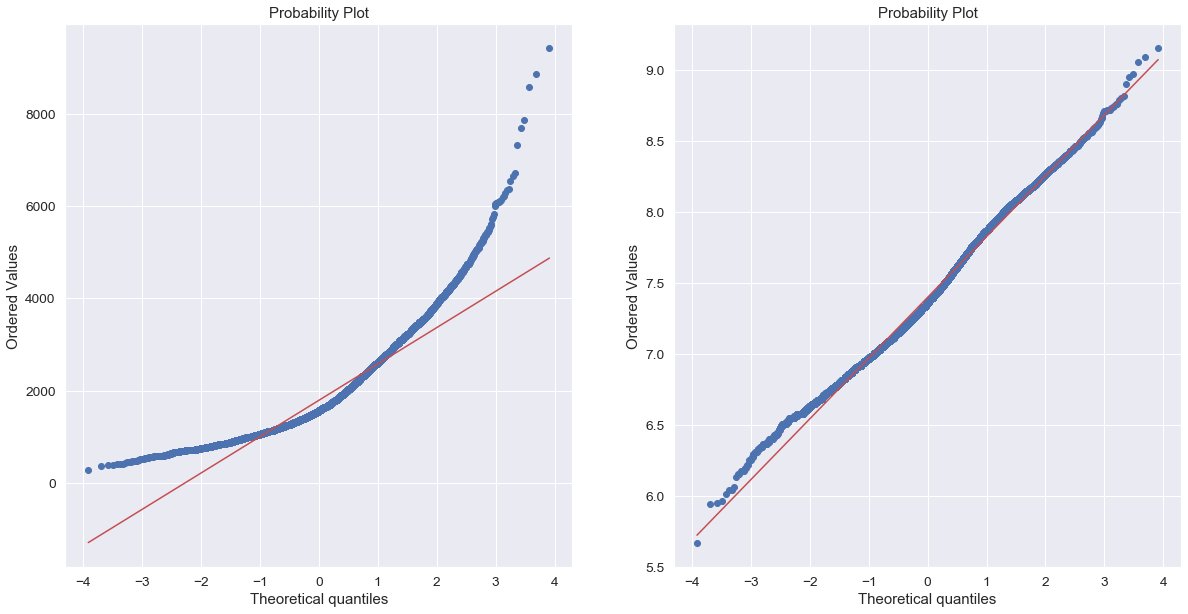

In [19]:
fig = plt.figure(figsize=(20,10))

# 플롯 두개 그려서 비교

fig.add_subplot(1,2,1) # (1,2,1) : 1*2 행렬의 첫번째 
res = stats.probplot( df['sqft_above'], plot = plt) #probplot : QQ플롯을 그리기 위한 명령어

fig.add_subplot(1,2,2)
res = stats.probplot( np.log1p(df['sqft_above']), plot=plt) #log 취해줌 > 정규성 가짐!

### 5) bathroom(화장실의 수) - price 관계 시각화
- 0.5 : 세면대, 화장실
- 0.75 : 세면대, 화장실, 샤워실
- 1 : 세면대, 화장실, 샤워실, 욕조

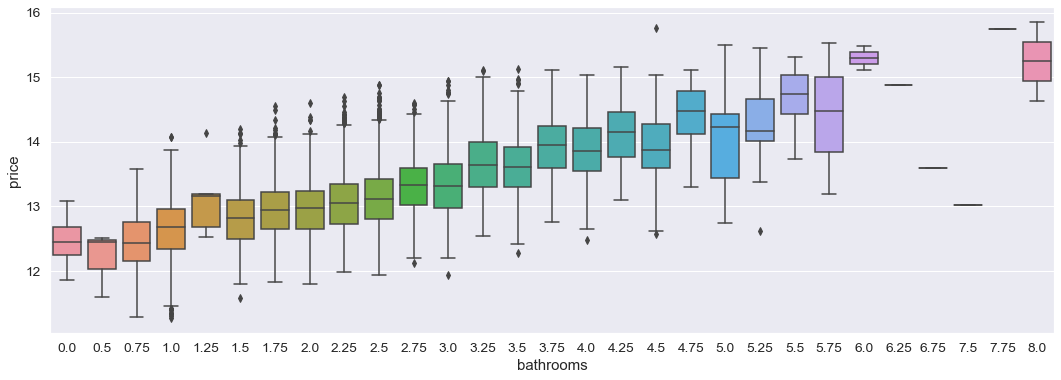

In [20]:
data = pd.concat( [ df['bathrooms'], df['price']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(data=data, x='bathrooms', y='price')

### 6) bedrooms(침실의 수)-price 관계 시각화

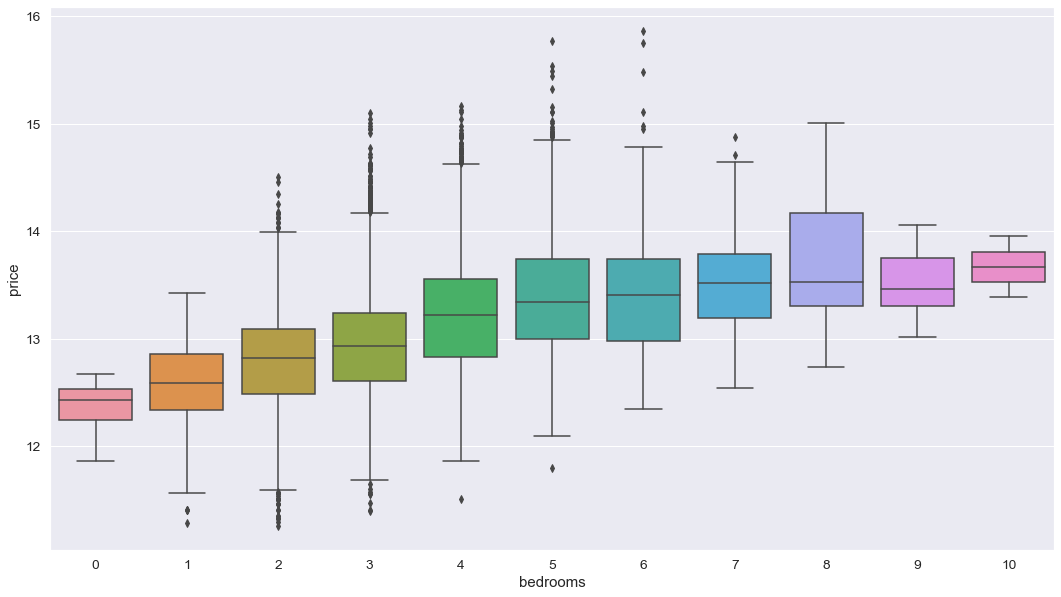

In [21]:
data = pd.concat( [ df['bedrooms'], df['price']], axis=1)
f, ax = plt.subplots(figsize=(18, 10))
fig = sns.boxplot(data=data, x='bedrooms', y='price')

## <font color = 'purple'>**2. 기본 전처리**
### 1) 정규화
회귀 돌리려면 x, y 모두 정규화 해주면 좋음!   
지금 상관계수 높은 주요 변수가 다 skew된 상황인데, 정규화 해주자!

In [22]:
# 평방피트 관련 변수 로그 정규화(train, test 둘다!)

skew_cols = ['sqft_living', 'sqft_living15', 'sqft_above', 'sqft_lot', 'sqft_basement']

for c in skew_cols:
    df[c] = np.log1p(df[c].values)
    df_test[c] = np.log1p(df_test[c].values)

### 2) 이상치 제거
등급 가격 boxplot도 그렇고 이상치가 존재함!    
똑똑하게 제거해보고 싶긴 한데,,,,     
사실 정규화하면 이상치가 다 보정되니까 제거하고싶지 않네? 조금만 해야지!

In [23]:
# grade 11에서 두드러졌던 이상치만 제거!

df.loc[ (df['grade']==11) & (df['price']>15.5) ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,15.77031,5,4.5,2.323802,10.527445,2.0,1,2,...,11,8.946505,7.766841,1940,2001,98004,47.65,-122.214,8.276649,25449


In [24]:
df.drop([df.index[2775]], inplace=True)

### 3) 기본 변수 수정 (위치정보 제외)
### < 1. waterfront >

In [25]:
df[df['waterfront']==0]['waterfront']

0        0
1        0
2        0
3        0
4        0
        ..
15030    0
15031    0
15032    0
15033    0
15034    0
Name: waterfront, Length: 14928, dtype: int64

In [26]:
(df['waterfront']==0).shape

(15034,)

In [27]:
df[df['waterfront']==0].shape

(14928, 21)

In [28]:
df[df['waterfront']==0]['waterfront'].shape 

(14928,)

아니 난 위 세개의 차이점을 모르겠는거다 !   
#### <font color = 'red'> *알았다!!! 조건이 있을 때는 df [ ] 로 한번 더 묶어줘야 한대!  아니면 함수 적용이 안된대ㅠㅠ*
근데 아무튼 0의 비율이 개많은건 맞다.....    
따라서 나는 그냥 이 변수 제거하고싶어졌다

In [29]:
df.drop('waterfront', axis=1, inplace=True) # 가차없이 제거

In [30]:
df_test.drop('waterfront', axis=1, inplace=True)

### < 2. date & yr_renovated(재건축년도) >
date 뒤에 T000000되어있는거......안녕....!  
yr_renovated(재건축 년도)도 재건축 안했으면 0으로 되어있음..!!   
0보단 원래 년도가 낫지않을까? 

In [31]:
df['date'].head()

0    20141013T000000
1    20150225T000000
2    20150218T000000
3    20140627T000000
4    20150115T000000
Name: date, dtype: object

In [32]:
df[df['yr_renovated']!=0].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
26,26,20140613T000000,13.453106,3,2.50,2.168036,8.026497,1.5,0,3,8,7.320527,6.673298,1930,2002,98115,47.6827,-122.310,7.372118,3264
78,78,20141121T000000,13.515082,3,3.50,2.239116,8.756368,2.0,0,3,8,7.930566,7.378384,1900,1999,98117,47.6981,-122.368,7.512618,6350
149,149,20150221T000000,14.224304,5,3.00,2.208492,10.418554,1.0,3,3,9,7.534228,7.266129,1957,1991,98040,47.5673,-122.210,8.252446,20953
160,160,20150413T000000,13.392392,2,1.75,2.113844,9.667702,2.0,4,3,7,7.115582,5.398163,1915,1978,98166,47.4497,-122.375,7.616284,13193
166,166,20150320T000000,12.923915,4,1.00,2.150167,8.464003,1.5,0,3,7,7.421178,5.707110,1904,2005,98122,47.6136,-122.303,7.320527,4740


In [33]:
# for문으로 한번에 처리하기

for df in [df, df_test] : 
    df['date'] = df['date'].apply(lambda x:x[0:8]) # lambda x : 뒤에 하고싶은거!
    df['date'] = pd.to_datetime(df['date']) # to_datetime : 년/월/일로 바꿔주는 함수
    
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x : np.nan if x==0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna( df['yr_built'])
    df['yr_renovated'] = df['yr_renovated'].astype('int32') # 정수로 바꿈
    
    # 결측치 만들고 yr_built로 fillna 해준다~

### 4) 기본 변수 생성 (위치정보 제외)

In [35]:
for df in [df, df_test]:
    
    df['total_rooms'] = df['bedrooms'] + df['bathrooms'] 
    
    #거실의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot'] 
    df['sqft_total_size'] = df['sqft_above'] + df['sqft_basement']
    
    # 전체 면적 대비 거실의 비율 
    df['living_ratio'] = df['sqft_living'] / df['sqft_total_size']
    df['living15_ratio'] = df['sqft_living15'] / df['sqft_lot15'] 

    #재건축 여부 (0, 1구분, lambda 함수 이용)
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x:0 if x==0 else 1) #0으로 바꿈

In [36]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,living_ratio,living15_ratio,is_renovated
0,15035,2014-12-09,3,2.25,7.852050,8.887791,2.0,0,3,7,...,47.7210,-122.319,7.433075,7639,5.25,0.883465,13.676905,0.574110,0.000973,1
1,15036,2014-12-09,4,3.00,7.581210,8.517393,1.0,0,5,7,...,47.5208,-122.393,7.215975,5000,7.00,0.890086,13.772040,0.550478,0.001443,0
2,15037,2014-05-12,4,4.50,8.598036,11.532051,1.0,0,3,11,...,47.6561,-122.005,8.468213,101930,8.50,0.745577,15.600098,0.551153,0.000083,0
3,15038,2015-04-15,3,1.00,7.484930,8.918784,1.0,0,3,7,...,47.5123,-122.337,7.484930,8113,4.00,0.839232,13.551911,0.552315,0.000923,0
4,15039,2015-03-12,3,2.50,7.544861,8.788898,2.0,0,3,7,...,47.3684,-122.031,7.779467,7570,5.50,0.858454,7.544861,1.000000,0.001028,0


In [43]:
df.to_csv('base_data.csv')